# **Q2**

Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

input data

In [2]:
d = [1] * 100 + [-1] * 100

Q2A

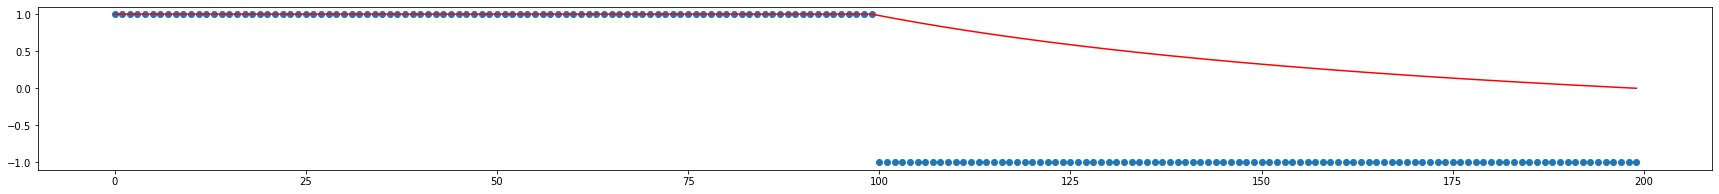

In [3]:
d_cumsum = np.cumsum(d)
avg = [val / (i + 1) for i, val in enumerate(d_cumsum)]

plt.figure(figsize=(30, 3))
plt.scatter(range(200), d)
plt.plot(range(200), avg, c='r')

Q2B, Q2C

In [4]:
def Q2B(beta, input_data):
    m_1 = []
    for val in input_data:
        if m_1:
            m_1.append(beta * m_1[-1] + (1 - beta) * val)
        else:
            m_1.append(beta * 0 + (1 - beta) * val)

    plt.figure(figsize=(30, 3))
    plt.scatter(range(200), d)
    plt.plot(range(200), m_1, c='r')
    plt.show()
    return m_1

def Q2C(beta, m_1):
    m_2 = []
    for i, val in enumerate(m_1):
        if m_2:
            m_2.append(val / (1 - beta ** i))
        else:
            m_2.append(0)

    plt.figure(figsize=(30, 3))
    plt.scatter(range(200), d)
    plt.plot(range(200), m_2, c='r')
    plt.show()
    return m_2

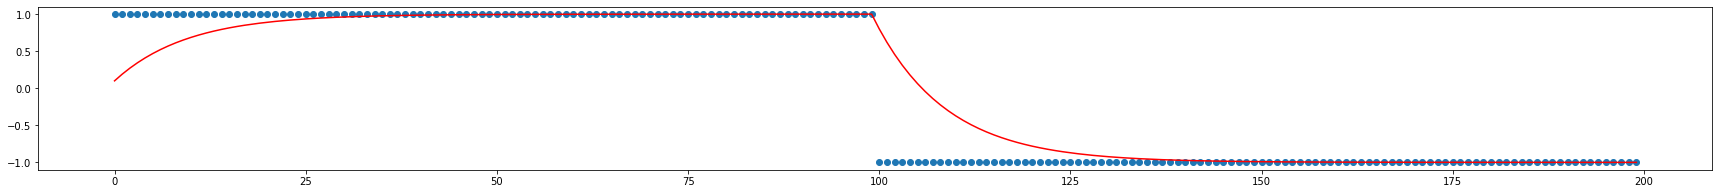

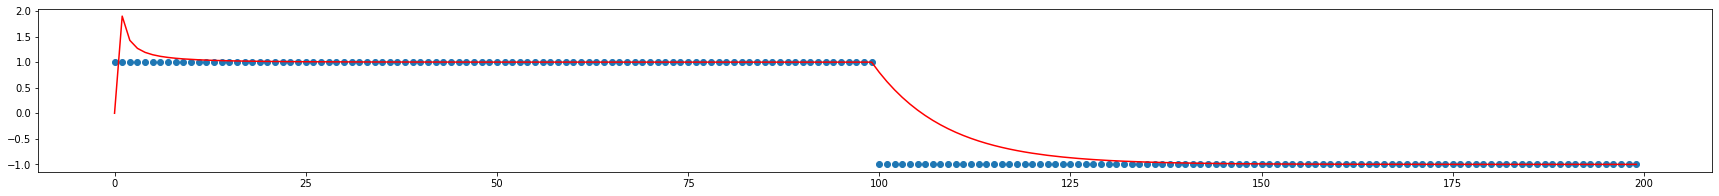

In [5]:
m_1 = Q2B(.9, d)
m_2 = Q2C(.9, m_1)

Q2D

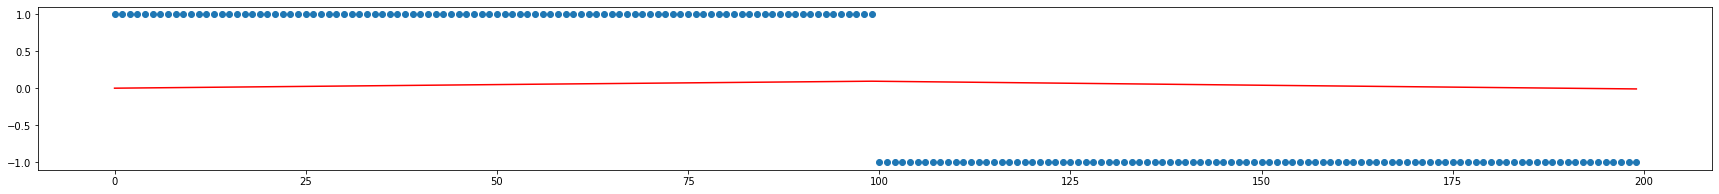

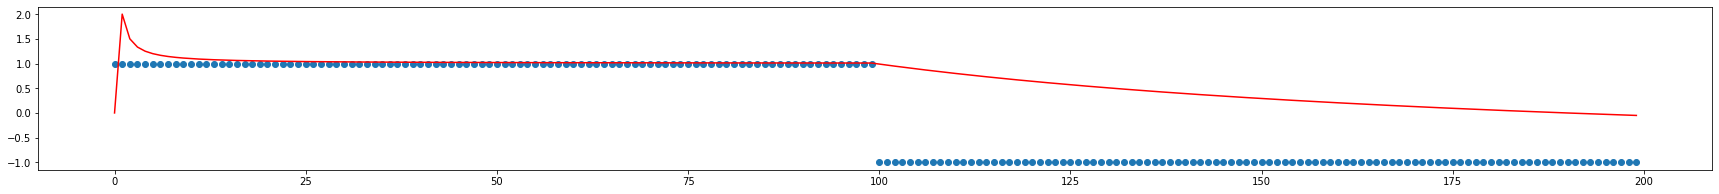

In [6]:
m_1 = Q2B(.999, d)
m_2 = Q2C(.999, m_1)

# **Q3**

Imports

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras import layers
from tensorflow.keras.optimizers import SGD, Adam, Adagrad, RMSprop
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
import random

Load data

In [8]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
number_of_labels = len(np.unique(y_train))
input_shape = x_train.shape[1:]

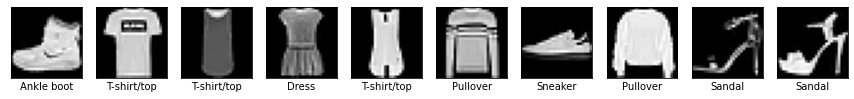

In [9]:
plt.figure(figsize=(15, 1.5))
for i in range(10):
  plt.subplot(1, 10, i + 1)
  plt.xticks([])
  plt.yticks([])
  plt.xlabel(class_names[y_train[i]])
  plt.imshow(x_train[i], cmap='gray')

Normalize

In [10]:
# sc = StandardScaler()
# sc.fit(x_train)
# x_train = sc.transform(x_train)
# x_test = sc.transform(x_test)
x_train = x_train / 255.0
x_test = x_test / 255.0

Configs

In [11]:
np.random.seed(1)
random.seed(1)
tf.random.set_seed(1)

MLP class

In [12]:
class ThreeLayerMLP:
    def __init__(self, 
                 learning_rate=0.001, 
                 epochs=50,
                 number_of_hidden_neurons=16,
                 loss_function='sparse_categorical_crossentropy', 
                 validation_prop=.3, 
                 optimizer='sgd'):
        
        self.lr = learning_rate
        self.epochs = epochs
        self.hidden_neurons = number_of_hidden_neurons
        self.loss = loss_function
        self.validation_prop = validation_prop
        self.optimizer_map = {'sgd': SGD(learning_rate=self.lr, momentum=0.9),
                              'adam': Adam(learning_rate=self.lr),
                              'rmsprop': RMSprop(learning_rate=self.lr),
                              'adagrad': Adagrad(learning_rate=self.lr)}
        self.optimizer = self.optimizer_map[optimizer]
        self.name = 'model_hn_' + str(self.hidden_neurons) + '_vp_' + str(self.validation_prop * 100) + '_op_' + str(optimizer) + '_lr_' + str(self.lr) + '_ep_' + str(self.epochs)

    def create_model(self, input_shape, number_of_labels):
        self.model = Sequential(name=self.name)
        self.model.add(layers.Flatten(input_shape=input_shape))
        self.model.add(layers.Dense(self.hidden_neurons, activation='relu'))
        self.model.add(layers.Dense(number_of_labels, activation='sigmoid'))
        self.model.compile(optimizer=self.optimizer, loss=self.loss, metrics=['accuracy',])
        return self
    
    def fit(self, X, Y):
        self.history = self.model.fit(X, Y, batch_size=128, epochs=self.epochs, validation_split=self.validation_prop)
        return self

    def evaluate(self, X, Y):
        self.test_results = self.model.evaluate(X, Y, verbose=0)
        return self
    
    def summary(self):
        print(self.model.summary())
        print()
        print('train data accuracy:', self.history.history['accuracy'][-1], 'loss:', self.history.history['loss'][-1])
        print('validation accuracy:', self.history.history['val_accuracy'][-1], 'loss:', self.history.history['val_loss'][-1])
        print('test data accuracy:', self.test_results[1], 'loss:', self.test_results[0])
        print('-'*100)


Train models with diffrent number of hidden neurons

In [13]:
model_hn_16 = ThreeLayerMLP().create_model(input_shape, number_of_labels).fit(x_train, y_train).evaluate(x_test, y_test)
model_hn_32 = ThreeLayerMLP(number_of_hidden_neurons=32).create_model(input_shape, number_of_labels).fit(x_train, y_train).evaluate(x_test, y_test)
model_hn_64 = ThreeLayerMLP(number_of_hidden_neurons=64).create_model(input_shape, number_of_labels).fit(x_train, y_train).evaluate(x_test, y_test)
model_hn_128 = ThreeLayerMLP(number_of_hidden_neurons=128).create_model(input_shape, number_of_labels).fit(x_train, y_train).evaluate(x_test, y_test)

Epoch 1/50
329/329 [==============================] - 2s 4ms/step - loss: 1.5061 - accuracy: 0.5428 - val_loss: 1.0197 - val_accuracy: 0.6957
Epoch 2/50
329/329 [==============================] - 1s 3ms/step - loss: 0.8720 - accuracy: 0.7273 - val_loss: 0.7707 - val_accuracy: 0.7494
Epoch 3/50
329/329 [==============================] - 1s 3ms/step - loss: 0.7214 - accuracy: 0.7612 - val_loss: 0.6798 - val_accuracy: 0.7679
Epoch 4/50
329/329 [==============================] - 1s 3ms/step - loss: 0.6522 - accuracy: 0.7805 - val_loss: 0.6307 - val_accuracy: 0.7832
Epoch 5/50
329/329 [==============================] - 1s 3ms/step - loss: 0.6102 - accuracy: 0.7949 - val_loss: 0.5961 - val_accuracy: 0.7957
Epoch 6/50
329/329 [==============================] - 1s 3ms/step - loss: 0.5811 - accuracy: 0.8043 - val_loss: 0.5727 - val_accuracy: 0.8053
Epoch 7/50
329/329 [==============================] - 1s 3ms/step - loss: 0.5588 - accuracy: 0.8125 - val_loss: 0.5535 - val_accuracy: 0.8107
Epoch 

In [14]:
model_hn_16.summary()
model_hn_32.summary()
model_hn_64.summary()
model_hn_128.summary()

Model: "model_hn_16_vp_30.0_op_sgd_lr_0.001_ep_50"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 16)                12560     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                170       
Total params: 12,730
Trainable params: 12,730
Non-trainable params: 0
_________________________________________________________________
None

train data accuracy: 0.8617619276046753 loss: 0.4000664949417114
validation accuracy: 0.8533889055252075 loss: 0.4238159656524658
test data accuracy: 0.843500018119812 loss: 0.44980546832084656
----------------------------------------------------------------------------------------------------
Model: "model_hn_32_vp_30.0_op_sgd_lr_0.001_ep_50"

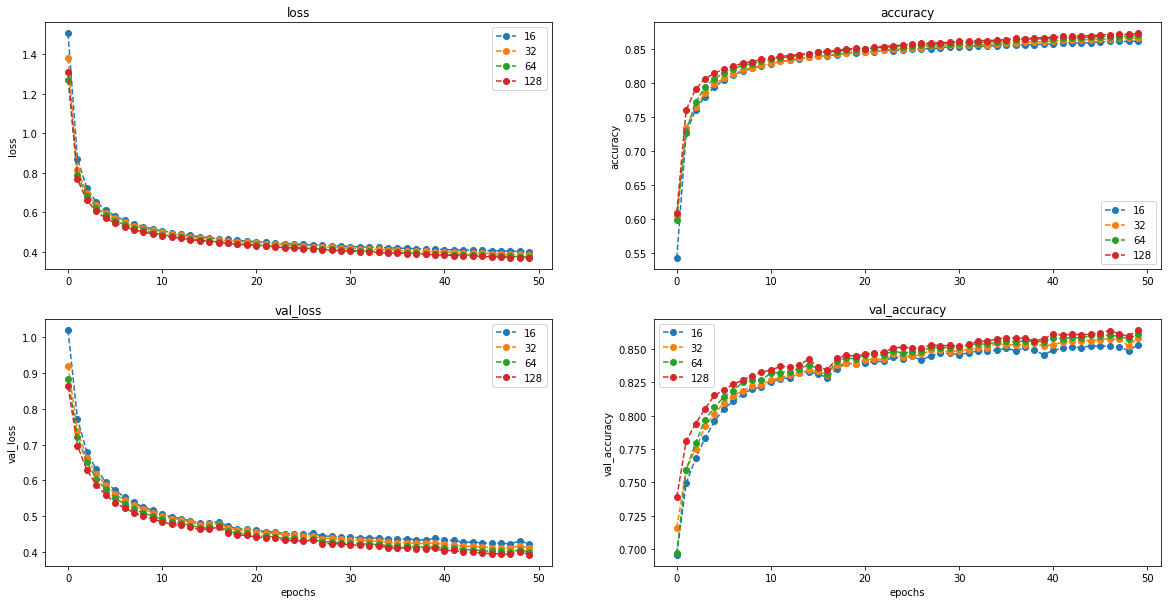

In [26]:
plt.figure(figsize=(20,10))
graphs = ['loss', 'accuracy', 'val_loss', 'val_accuracy']
for i, g in enumerate(graphs):
    plt.subplot(2, 2, i + 1)
    
    plt.plot(model_hn_16.history.history[g], 'o--')
    plt.plot(model_hn_32.history.history[g], 'o--')
    plt.plot(model_hn_64.history.history[g], 'o--')
    plt.plot(model_hn_128.history.history[g], 'o--')
    
    if i >= 2:
        plt.xlabel('epochs')
    plt.ylabel(g)
    plt.legend(['16', '32', '64', '128'])
    plt.title(g)

Train models with diffrent validation prop

In [15]:
model_hn_16_vp_50 = ThreeLayerMLP(validation_prop=.5).create_model(input_shape, number_of_labels).fit(x_train, y_train).evaluate(x_test, y_test)
model_hn_32_vp_50 = ThreeLayerMLP(number_of_hidden_neurons=32, validation_prop=.5).create_model(input_shape, number_of_labels).fit(x_train, y_train).evaluate(x_test, y_test)
model_hn_64_vp_50 = ThreeLayerMLP(number_of_hidden_neurons=64, validation_prop=.5).create_model(input_shape, number_of_labels).fit(x_train, y_train).evaluate(x_test, y_test)
model_hn_128_vp_50 = ThreeLayerMLP(number_of_hidden_neurons=128, validation_prop=.5).create_model(input_shape, number_of_labels).fit(x_train, y_train).evaluate(x_test, y_test)
model_hn_16_vp_10 = ThreeLayerMLP(validation_prop=.1).create_model(input_shape, number_of_labels).fit(x_train, y_train).evaluate(x_test, y_test)
model_hn_32_vp_10 = ThreeLayerMLP(number_of_hidden_neurons=32, validation_prop=.1).create_model(input_shape, number_of_labels).fit(x_train, y_train).evaluate(x_test, y_test)
model_hn_64_vp_10 = ThreeLayerMLP(number_of_hidden_neurons=64, validation_prop=.1).create_model(input_shape, number_of_labels).fit(x_train, y_train).evaluate(x_test, y_test)
model_hn_128_vp_10 = ThreeLayerMLP(number_of_hidden_neurons=128, validation_prop=.1).create_model(input_shape, number_of_labels).fit(x_train, y_train).evaluate(x_test, y_test)

Epoch 1/50
235/235 [==============================] - 2s 5ms/step - loss: 1.8485 - accuracy: 0.3320 - val_loss: 1.4032 - val_accuracy: 0.5921
Epoch 2/50
235/235 [==============================] - 1s 4ms/step - loss: 1.1531 - accuracy: 0.6434 - val_loss: 0.9641 - val_accuracy: 0.6829
Epoch 3/50
235/235 [==============================] - 1s 4ms/step - loss: 0.8912 - accuracy: 0.6972 - val_loss: 0.8164 - val_accuracy: 0.7211
Epoch 4/50
235/235 [==============================] - 1s 3ms/step - loss: 0.7821 - accuracy: 0.7330 - val_loss: 0.7363 - val_accuracy: 0.7567
Epoch 5/50
235/235 [==============================] - 1s 3ms/step - loss: 0.7163 - accuracy: 0.7573 - val_loss: 0.6829 - val_accuracy: 0.7731
Epoch 6/50
235/235 [==============================] - 1s 3ms/step - loss: 0.6696 - accuracy: 0.7754 - val_loss: 0.6463 - val_accuracy: 0.7862
Epoch 7/50
235/235 [==============================] - 1s 4ms/step - loss: 0.6360 - accuracy: 0.7867 - val_loss: 0.6170 - val_accuracy: 0.7956
Epoch 

In [16]:
model_hn_16_vp_50.summary()
model_hn_32_vp_50.summary()
model_hn_64_vp_50.summary()
model_hn_128_vp_50.summary()
model_hn_16_vp_10.summary()
model_hn_32_vp_10.summary()
model_hn_64_vp_10.summary()
model_hn_128_vp_10.summary()

Model: "model_hn_16_vp_50.0_op_sgd_lr_0.001_ep_50"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 16)                12560     
_________________________________________________________________
dense_9 (Dense)              (None, 10)                170       
Total params: 12,730
Trainable params: 12,730
Non-trainable params: 0
_________________________________________________________________
None

train data accuracy: 0.8537999987602234 loss: 0.4195249378681183
validation accuracy: 0.8503000140190125 loss: 0.43963223695755005
test data accuracy: 0.8381999731063843 loss: 0.46709883213043213
----------------------------------------------------------------------------------------------------
Model: "model_hn_32_vp_50.0_op_sgd_lr_0.001_ep_5

Train models with diffrent optimizer

In [17]:
model_op_adam = ThreeLayerMLP(number_of_hidden_neurons=128, optimizer='adam').create_model(input_shape, number_of_labels).fit(x_train, y_train).evaluate(x_test, y_test)
model_op_rmsprop = ThreeLayerMLP(number_of_hidden_neurons=128, optimizer='rmsprop').create_model(input_shape, number_of_labels).fit(x_train, y_train).evaluate(x_test, y_test)
model_op_adagrad = ThreeLayerMLP(number_of_hidden_neurons=128, optimizer='adagrad').create_model(input_shape, number_of_labels).fit(x_train, y_train).evaluate(x_test, y_test)

Epoch 1/50
329/329 [==============================] - 2s 6ms/step - loss: 0.5939 - accuracy: 0.7982 - val_loss: 0.4979 - val_accuracy: 0.8149
Epoch 2/50
329/329 [==============================] - 2s 5ms/step - loss: 0.4264 - accuracy: 0.8516 - val_loss: 0.4448 - val_accuracy: 0.8378
Epoch 3/50
329/329 [==============================] - 2s 5ms/step - loss: 0.3903 - accuracy: 0.8637 - val_loss: 0.3843 - val_accuracy: 0.8676
Epoch 4/50
329/329 [==============================] - 2s 5ms/step - loss: 0.3611 - accuracy: 0.8720 - val_loss: 0.3783 - val_accuracy: 0.8647
Epoch 5/50
329/329 [==============================] - 2s 5ms/step - loss: 0.3397 - accuracy: 0.8788 - val_loss: 0.3656 - val_accuracy: 0.8693
Epoch 6/50
329/329 [==============================] - 2s 5ms/step - loss: 0.3246 - accuracy: 0.8820 - val_loss: 0.3596 - val_accuracy: 0.8724
Epoch 7/50
329/329 [==============================] - 2s 5ms/step - loss: 0.3121 - accuracy: 0.8875 - val_loss: 0.3382 - val_accuracy: 0.8779
Epoch 

In [18]:
model_hn_128.summary()
model_op_adam.summary()
model_op_rmsprop.summary()
model_op_adagrad.summary()

Model: "model_hn_128_vp_30.0_op_sgd_lr_0.001_ep_50"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_7 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
None

train data accuracy: 0.8732619285583496 loss: 0.3675530254840851
validation accuracy: 0.8644999861717224 loss: 0.3934265375137329
test data accuracy: 0.853600025177002 loss: 0.4188225567340851
----------------------------------------------------------------------------------------------------
Model: "model_hn_128_vp_30.0_op_adam_lr_0.001_ep

Plot train and validation loss and accuracy for all models

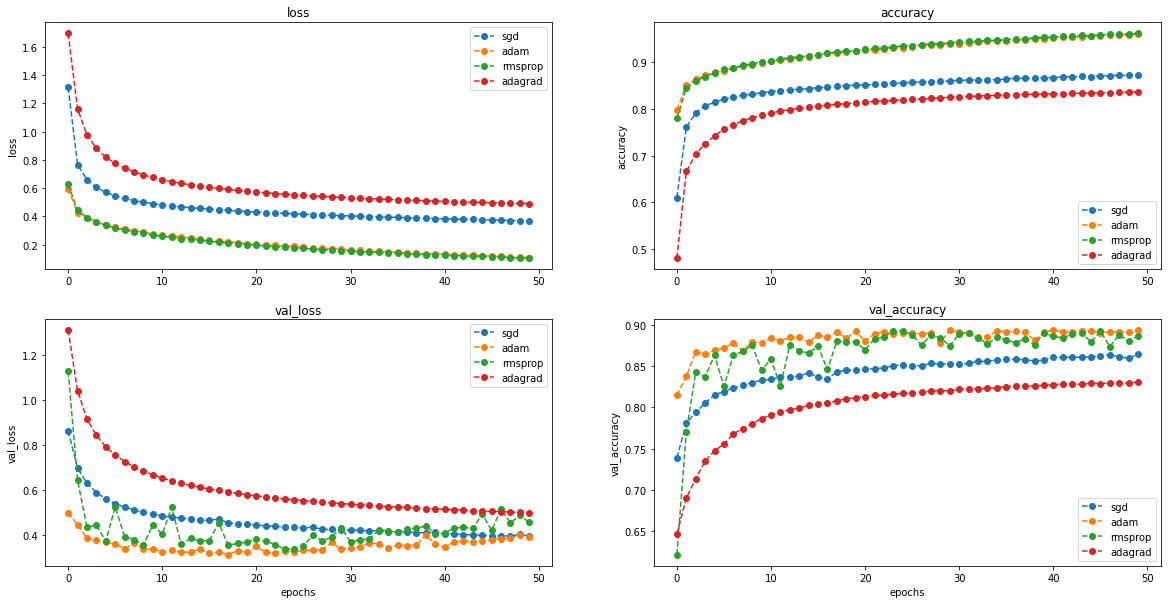

In [19]:
plt.figure(figsize=(20,10))
graphs = ['loss', 'accuracy', 'val_loss', 'val_accuracy']
for i, g in enumerate(graphs):
    plt.subplot(2, 2, i + 1)
    
    plt.plot(model_hn_128.history.history[g], 'o--')
    plt.plot(model_op_adam.history.history[g], 'o--')
    plt.plot(model_op_rmsprop.history.history[g], 'o--')
    plt.plot(model_op_adagrad.history.history[g], 'o--')
    
    if i >= 2:
        plt.xlabel('epochs')
    plt.ylabel(g)
    plt.legend(['sgd', 'adam', 'rmsprop', 'adagrad'])
    plt.title(g)

Train models with diffrent learning rate

In [20]:
model_lr_dot_0001 = ThreeLayerMLP(number_of_hidden_neurons=128, optimizer='adam', learning_rate=.0001).create_model(input_shape, number_of_labels).fit(x_train, y_train).evaluate(x_test, y_test)
model_lr_dot_01 = ThreeLayerMLP(number_of_hidden_neurons=128, optimizer='adam', learning_rate=.01).create_model(input_shape, number_of_labels).fit(x_train, y_train).evaluate(x_test, y_test)
model_lr_dot_1 = ThreeLayerMLP(number_of_hidden_neurons=128, optimizer='adam', learning_rate=.1).create_model(input_shape, number_of_labels).fit(x_train, y_train).evaluate(x_test, y_test)

Epoch 1/50
329/329 [==============================] - 2s 6ms/step - loss: 1.0655 - accuracy: 0.6675 - val_loss: 0.7040 - val_accuracy: 0.7791
Epoch 2/50
329/329 [==============================] - 2s 5ms/step - loss: 0.6282 - accuracy: 0.7984 - val_loss: 0.5746 - val_accuracy: 0.8127
Epoch 3/50
329/329 [==============================] - 2s 5ms/step - loss: 0.5432 - accuracy: 0.8229 - val_loss: 0.5207 - val_accuracy: 0.8248
Epoch 4/50
329/329 [==============================] - 2s 6ms/step - loss: 0.4981 - accuracy: 0.8341 - val_loss: 0.4907 - val_accuracy: 0.8325
Epoch 5/50
329/329 [==============================] - 2s 5ms/step - loss: 0.4705 - accuracy: 0.8420 - val_loss: 0.4703 - val_accuracy: 0.8404
Epoch 6/50
329/329 [==============================] - 2s 5ms/step - loss: 0.4512 - accuracy: 0.8484 - val_loss: 0.4521 - val_accuracy: 0.8458
Epoch 7/50
329/329 [==============================] - 2s 5ms/step - loss: 0.4351 - accuracy: 0.8523 - val_loss: 0.4430 - val_accuracy: 0.8484
Epoch 

In [21]:
model_lr_dot_0001.summary()
model_op_adam.summary()
model_lr_dot_01.summary()
model_lr_dot_1.summary()

Model: "model_hn_128_vp_30.0_op_adam_lr_0.0001_ep_50"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_15 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_30 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_31 (Dense)             (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
None

train data accuracy: 0.9038095474243164 loss: 0.27398842573165894
validation accuracy: 0.8818333148956299 loss: 0.33485642075538635
test data accuracy: 0.8697999715805054 loss: 0.3612525165081024
----------------------------------------------------------------------------------------------------
Model: "model_hn_128_vp_30.0_op_adam_lr_0.0

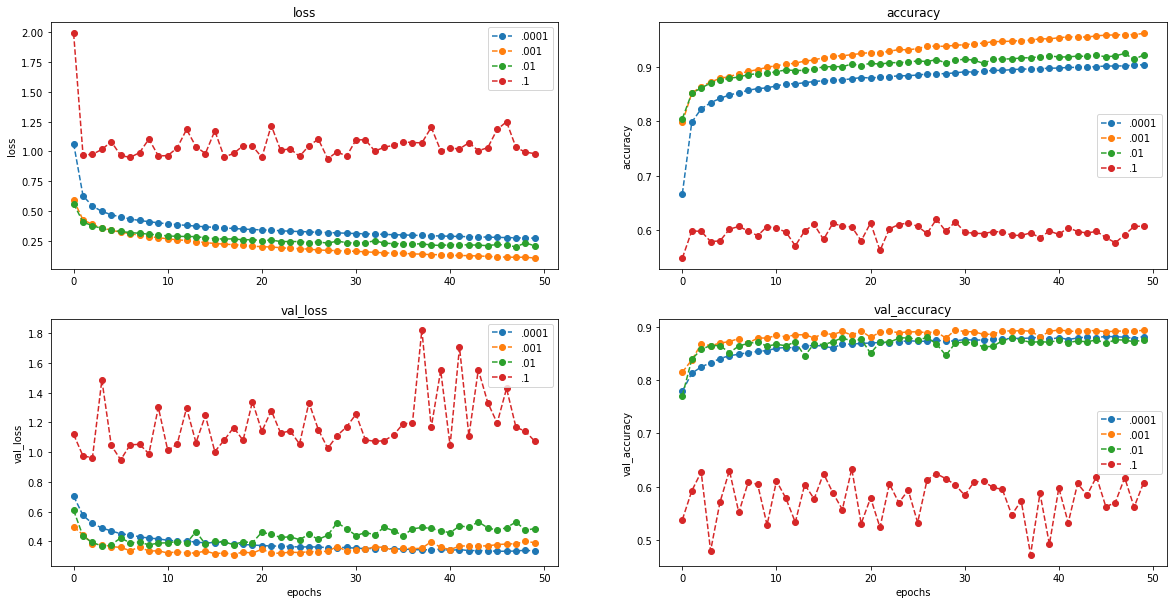

In [22]:
plt.figure(figsize=(20,10))
graphs = ['loss', 'accuracy', 'val_loss', 'val_accuracy']
for i, g in enumerate(graphs):
    plt.subplot(2, 2, i + 1)
    
    plt.plot(model_lr_dot_0001.history.history[g], 'o--')
    plt.plot(model_op_adam.history.history[g], 'o--')
    plt.plot(model_lr_dot_01.history.history[g], 'o--')
    plt.plot(model_lr_dot_1.history.history[g], 'o--')
    
    if i >= 2:
        plt.xlabel('epochs')
    plt.ylabel(g)
    plt.legend(['.0001', '.001', '.01', '.1'])
    plt.title(g)

Train models with diffrent epochs

In [23]:
model_ep_10 = ThreeLayerMLP(number_of_hidden_neurons=128, optimizer='adam', epochs=10).create_model(input_shape, number_of_labels).fit(x_train, y_train).evaluate(x_test, y_test)

Epoch 1/10
329/329 [==============================] - 2s 6ms/step - loss: 0.5985 - accuracy: 0.7937 - val_loss: 0.4732 - val_accuracy: 0.8297
Epoch 2/10
329/329 [==============================] - 2s 5ms/step - loss: 0.4293 - accuracy: 0.8504 - val_loss: 0.4419 - val_accuracy: 0.8408
Epoch 3/10
329/329 [==============================] - 2s 5ms/step - loss: 0.3940 - accuracy: 0.8612 - val_loss: 0.3867 - val_accuracy: 0.8648
Epoch 4/10
329/329 [==============================] - 2s 6ms/step - loss: 0.3649 - accuracy: 0.8699 - val_loss: 0.3743 - val_accuracy: 0.8651
Epoch 5/10
329/329 [==============================] - 2s 5ms/step - loss: 0.3403 - accuracy: 0.8786 - val_loss: 0.3589 - val_accuracy: 0.8724
Epoch 6/10
329/329 [==============================] - 2s 5ms/step - loss: 0.3258 - accuracy: 0.8812 - val_loss: 0.3584 - val_accuracy: 0.8719
Epoch 7/10
329/329 [==============================] - 2s 5ms/step - loss: 0.3128 - accuracy: 0.8880 - val_loss: 0.3399 - val_accuracy: 0.8797
Epoch 

In [24]:
model_op_adam.summary()
model_ep_10.summary()

Model: "model_hn_128_vp_30.0_op_adam_lr_0.001_ep_50"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_12 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_24 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_25 (Dense)             (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
None

train data accuracy: 0.9610952138900757 loss: 0.1074816882610321
validation accuracy: 0.8936111330986023 loss: 0.3911721706390381
test data accuracy: 0.8842999935150146 loss: 0.432856947183609
----------------------------------------------------------------------------------------------------
Model: "model_hn_128_vp_30.0_op_adam_lr_0.001_e

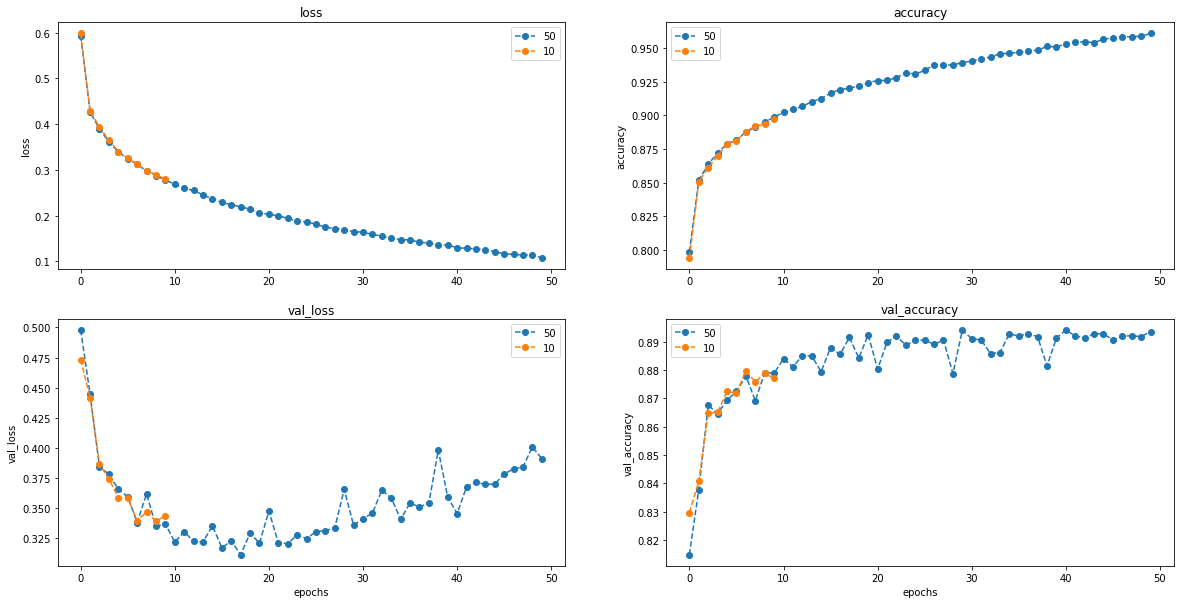

In [25]:
plt.figure(figsize=(20,10))
graphs = ['loss', 'accuracy', 'val_loss', 'val_accuracy']
for i, g in enumerate(graphs):
    plt.subplot(2, 2, i + 1)
    
    plt.plot(model_op_adam.history.history[g], 'o--')
    plt.plot(model_ep_10.history.history[g], 'o--')
    
    if i >= 2:
        plt.xlabel('epochs')
    plt.ylabel(g)
    plt.legend(['50', '10'])
    plt.title(g)